 This is the analysis of results from stroop experiement (Udacity Data Analysis Nanodegree course)
 data provided by Udacity
 author Anna S-G

 The dependent variable for this experiment is recorded time in seconds and this variable depends on the whether data is Congruent or Incongruent.
 In other words the independent variable is the matching of colour with text.

 I use one directional t-test for paired samples. 
 This is because the experiment is done twice each time with different conditions, but exactly on the same subjects.
 It is like experiment before and after treatment where treatment is swapping colours of words.
 Other observations are:
1. The data are numeric and continuous
2. The data are approximately based on normal distribution (more about this and outliers below).
3. We can assume that the observations are independent (meaning one participant is independent on another participant)


 The null hypothesis assumes that the population mean difference between Congruent (Mu_C) and Incongruent (Mu_In) times is zero,
 meaning that the mean difference between the two times is not statistically significant.
 The alternative hypothesis is that the population mean difference between  Congruent and Incongruent times is not zero.
 In fact that the population mean time for Inongruent data is higher than the population mean time for Congruent data.

H0: Mu_In-Mu_C = 0
HA: Mu_In-Mu_C > 0

In [435]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math 
from scipy import stats
from matplotlib import gridspec
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [436]:
filename = '/Users/Ania/Documents/CV/Courses/Nanodegree/Stroop_effect/stroopdata.csv'
stroop_df = pd.read_csv(filename)

In [437]:
def statistics(data):
    l = len(data)
    df = l-1
    mean = np.mean(data)
    var = np.var(data)
    #In here standard deviation is calculated for a sample, therefore parameter 'degreef of freedoom' ddof = 1.
    Sd = np.std(data, ddof = 1)
    
    return mean, var, Sd, df

def t_paired(data1, data2):
    l = len(data1)
    df = l-1
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    #below also standard deviation is calculated for a sample, therefore parameter 'degreef of freedoom' ddof = 1.
    SE = np.std(data1-data2, ddof = 1)/np.sqrt(l)
    t = (mean1-mean2)/SE
        
    return t, SE


In [438]:
n = len(stroop_df)
stroop_df['difference'] = stroop_df['Incongruent']-stroop_df['Congruent']
stroop_df

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [439]:
stroop_df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


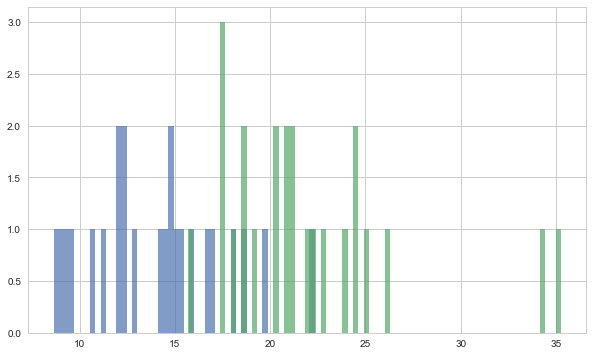

In [440]:
#Visual inspection of normality
fig = plt.figure(figsize=(10, 6)) 

plt.hist(stroop_df['Congruent'], bins = 50, orientation='vertical', alpha = 0.7, color=['b'])
plt.hist(stroop_df['Incongruent'], bins = 70, orientation='vertical',alpha = 0.7, color=['g'])
plt.show()

 There is a problem with the dateset since there is only a few data points.
 It is clear that we grossly assume that the distribution of data for both sets is approximately normal
 This is particularly true for Incongruent data which are clearely positively skewed

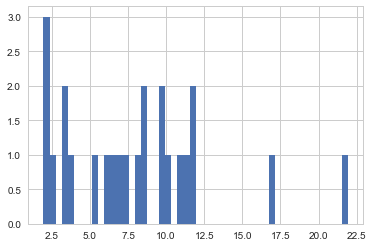

In [441]:
#visual inspection of distribution for the difference between respective times
plt.hist(stroop_df['difference'], bins = 50)
plt.show()

This set of data also seems positively skewed

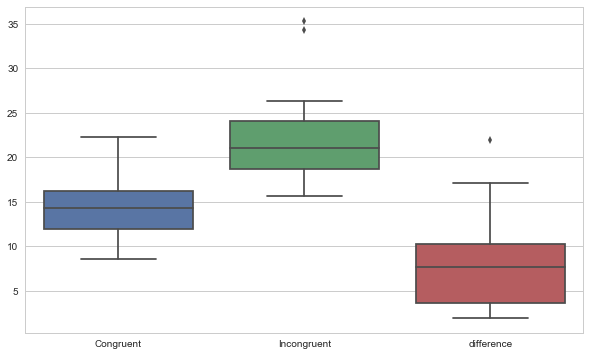

In [442]:
#Identification of potential outliers for the data
fig = plt.figure(figsize=(10, 6)) 
sns.boxplot(stroop_df)

It seems that the Incongruent data contain two outliers, this might potentially influence the result of our analysis
I purpose to analise the t-statistics including and excluding outliers and compare the results.

----------------------------------------
.......CALCULATIONS WITH OUTLIERS.....
----------------------------------------


In [443]:
#Calculation of statistical parameters (mean, variance, standard deviation and degree of freedom)

mu_diff, Var_diff, Sd_diff, df_diff = statistics(stroop_df['difference'])
mu_C, Var_C, Sd_C, df_C = statistics(stroop_df['Congruent'])
mu_In, Var_In, Sd_In, df_In = statistics(stroop_df['Incongruent'])

print 'mu_diff =', mu_diff, 'Var_diff = ', Var_diff, 'Sd_diff = ', Sd_diff, 'df_diff = ', df_diff
print 'mu_C = ', mu_C, 'Var_C = ', Var_C, 'Sd_C = ', Sd_C, 'df_C = ', df_C 
print 'mu_In = ', mu_In, 'Var_In = ', Var_In, 'Sd_In = ', Sd_In, 'df_In = ', df_In

mu_diff = 7.96479166667 Var_diff =  22.6804349983 Sd_diff =  4.86482691036 df_diff =  23
mu_C =  14.051125 Var_C =  12.1411528594 Sd_C =  3.55935795765 df_C =  23
mu_In =  22.0159166667 Var_In =  22.0529338264 Sd_In =  4.79705712247 df_In =  23


In [444]:
#Calculation of t-statistics

t_stat, SE = t_paired(stroop_df['Incongruent'], stroop_df['Congruent'])

print 't_stat = ', t_stat 
print 'SE = ', SE

t_stat =  8.02070694411
SE =  0.993028634778


p value is equal to p <  0.0001 so practically zero.  
t_crit = 1.717, df = 23 for alpha = 0.05 one tailed test
We reject the null hupothesis
Just in case we would consider two directional test t_crit = 2.074 @ alphe = 0.05

In [445]:
#Lets calculate the confidence intervals

t_crit = 1.717
CI_pos = mu_diff+t_crit*SE
CI_neg = mu_diff-t_crit*SE
print 'mu_diff =', mu_diff
print 'CI = ', (CI_neg, CI_pos)

mu_diff = 7.96479166667
CI =  (6.2597615007522549, 9.6698218325810767)


In [446]:
#lets calculate the effect size (Cohen's d) and the correlation factor r^2

C_d = mu_diff/Sd_diff
r_sq = (t_stat**2)/(t_stat**2+df_In)
print'C_d = ', C_d
print 'r^2 = ', r_sq 

C_d =  1.63721994912
r^2 =  0.736636416145


Cohen's d is rather small (below 2St_dev) however true meaning of this value depends on the experimental question and the expected values
The value of r^2 suggests that around 70 percent of values are correlated, 
meaning that knowing the result of Congruent time one could predict 70 percent of Incongruent times.
We could further plot the graph and inspect it visually

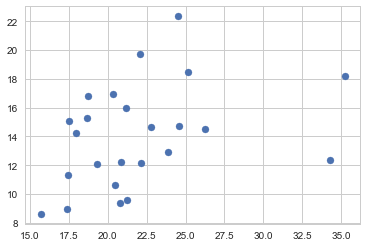

In [447]:
plt.scatter(stroop_df['Incongruent'], stroop_df['Congruent'])
plt.show()

at this point we may or may not see a definite proof for correlation, we should model the data
...but I will stop for now.

----------------------------------------
...CALCULATIONS WITHOUT OUTLIERS.....
----------------------------------------


In [448]:
#removing outliers from Incongruent
out = stroop_df.Incongruent.quantile(.95)
stroop_df_no = stroop_df[stroop_df.Incongruent<out]
stroop_df_no

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [449]:
stroop_df_o = stroop_df[stroop_df.Incongruent>out]
stroop_df_o

,Congruent,Incongruent,difference
14,18.200,35.255,17.055
19,12.369,34.288,21.919


So I removed two points above .95 percentile (no. 14, and 19) 

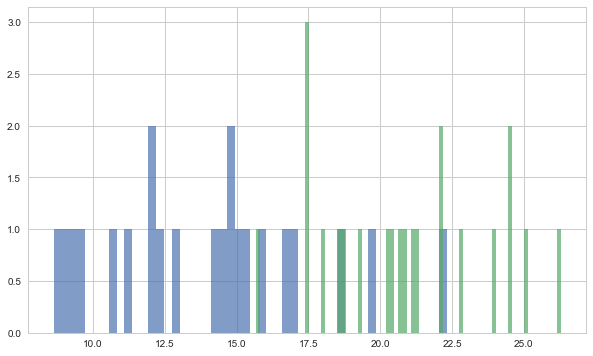

In [450]:
#Visual inspection of normality

fig = plt.figure(figsize=(10, 6)) 

plt.hist(stroop_df_no['Congruent'], bins = 50, orientation='vertical', alpha = 0.7, color=['b'])
plt.hist(stroop_df_no['Incongruent'], bins = 75, orientation='vertical',alpha = 0.7, color=['g'])
plt.show()

At the first glance the distribution looks more normal

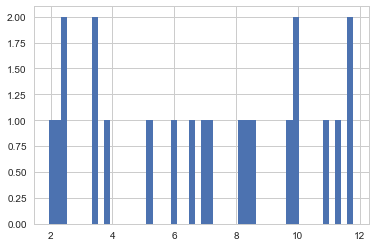

In [451]:
plt.hist(stroop_df_no['difference'], bins = 50)
plt.show()

This distribution has become more uniform

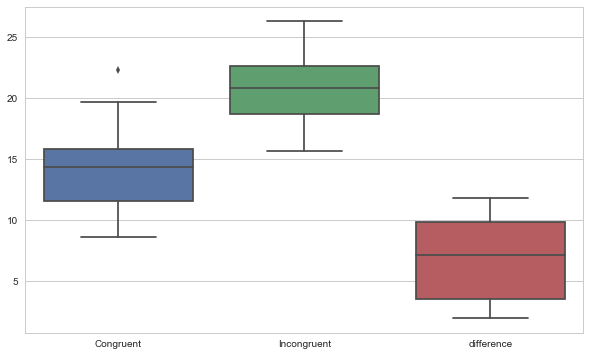

In [452]:
#Identification of potential outliers for the data with boxplot
fig = plt.figure(figsize=(10, 6)) 
sns.boxplot(stroop_df_no)

In [453]:
#Calculation of statistical parameters (mean, variance, standard deviation and degree of freedom)

mu_diff_no, Var_diff_no, Sd_diff_no, df_diff_no = statistics(stroop_df_no['difference'])
mu_C_no, Var_C_no, Sd_C_no, df_C_no = statistics(stroop_df_no['Congruent'])
mu_In_no, Var_In_no, Sd_In_no, df_In_no = statistics(stroop_df_no['Incongruent'])

print 'mu_diff_no =', mu_diff_no, 'Var_diff_no = ', Var_diff_no, 'Sd_diff_no = ', Sd_diff_no, 'df_diff_no = ', df_diff_no
print 'mu_C_no = ', mu_C_no, 'Var_C_no = ', Var_C_no, 'Sd_C_no = ', Sd_C_no, 'df_C_no = ', df_C_no 
print 'mu_In_no = ', mu_In_no, 'Var_In_no = ', Var_In_no, 'Sd_In_no = ', Sd_In_no, 'df_In_no = ', df_In_no

mu_diff_no = 6.91731818182 Var_diff_no =  11.0381912169 Sd_diff_no =  3.40056162569 df_diff_no =  21
mu_C_no =  13.939 Var_C_no =  12.3212898182 Sd_C_no =  3.59277301047 df_C_no =  21
mu_In_no =  20.8563181818 Var_In_no =  7.90047021694 Sd_In_no =  2.87692250233 df_In_no =  21


In [454]:
#Calculation of t-statistics

t_stat_no, SE_no = t_paired(stroop_df_no['Incongruent'], stroop_df_no['Congruent'])

print 't_stat_no = ', t_stat_no
print 'SE_no = ', SE_no

t_stat_no =  9.54109990849
SE_no =  0.725002174609


In [455]:
#p value is p < 0.0001
#Similarly to statistics with outliers in here we also reject the null.

In [456]:
t_change = (t_stat-t_stat_no)/t_stat*100
t_change

-18.955847345834407

Removing the outliers changed the t-statistics by about 20%. 
t_crit = 1.721 for df = 21 and alpha = 0.95
This doesn't change the overall result since both t-statistics strongly indicated that the mean difference is statistically significant.
the result of t-statistics after removal of outliers does not change the decision to reject the null.

In [457]:
#Lets calculate the confidence intervals
t_crit_no = 1.717
CI_pos_no = mu_diff_no+t_crit_no*SE_no
CI_neg_no = mu_diff_no-t_crit_no*SE_no
print 'mu_diff_no =', mu_diff_no
print 'CI_no = ', (CI_neg_no, CI_pos_no)

mu_diff_no = 6.91731818182
CI_no =  (5.6724894480145958, 8.162146915621765)


In [458]:
#lets calculate the effect size (Cohen's d) and the correlation factor r^2

C_d__no = mu_diff_no/Sd_diff_no
r_sq_no = t_stat_no**2/(t_stat_no**2+df_In_no)
print 'C_d_no = ', C_d_no
print 'r_sq_no = ', r_sq_no

C_d_no =  0.415852082531
r_sq_no =  0.812554539037


Again Cohen's d is small (below 1St_dev) again - true meaning of this value depends on the experimental question and the expected values
In here the correlation seems even stronger (around 81%) which is logical after removal of the outliers.

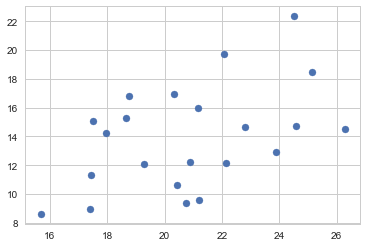

In [459]:
plt.scatter(stroop_df_no['Incongruent'], stroop_df_no['Congruent'])
plt.show()

--------CONCLUSIONS---------

 Analised data set was rather small, more participants of experiment would certainly increase the confidence of result. The result of a t-test with and without outliers allows for an assumption that the population mean difference between Congruent and Incongruent times is statistically significant. R^2 result also indicated both datasets are strongly correlated, which is also expected.
 The presence of two outliers in Incongruent dta might be either due to difficulty of the task or simple distraction, we don't know for sure.

In geneeral th experiment shows the difference in speed for two human reactions (speak colour and read word) where saying colour takes longer than reading. I expect there are research showing how and if this effect can be surpressed. Also one could think of designing a similar experiment where decision parts of the brain would be located in opposite hemispheres. It would be interesting to see if human reaction can be manipulated better.